# Importing Necessary Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib

# Loading Dataset Using Pandas

In [2]:
df = pd.read_csv("../dataset/car.csv")

# Dataset Analysis & Preprocessing

In [3]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

- Checking For Empty Columns

In [7]:
df['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

### Dropping Car_Name Column (Since too many Unique Values may harm the model)

In [8]:
df.drop(columns=['Car_Name'], inplace=True)

In [9]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Converting Year to Car Age

In [10]:
df['Car_Age'] = 2026 - df['Year']
df.drop(columns=['Year'], inplace=True)

In [11]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,12
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,13
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,9
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,15
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,12


### Encoding Categorical Variables using One-Hot Encoding

In [12]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,12,False,True,False,True
1,4.75,9.54,43000,0,13,True,False,False,True
2,7.25,9.85,6900,0,9,False,True,False,True
3,2.85,4.15,5200,0,15,False,True,False,True
4,4.60,6.87,42450,0,12,True,False,False,True


### Model Training and Performance Evaluation

- The dataset is split into training and testing sets (80:20).

In [13]:
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

- A Random Forest Regressor is trained to predict car selling prices.

In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


- Model performance is evaluated using R² Score, MAE, and MSE to assess prediction accuracy and error magnitude.

In [16]:
y_pred = model.predict(X_test)

In [17]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9599938850484411
MAE: 0.63872131147541
MSE: 0.9215642422950816


### Feature Importance Analysis

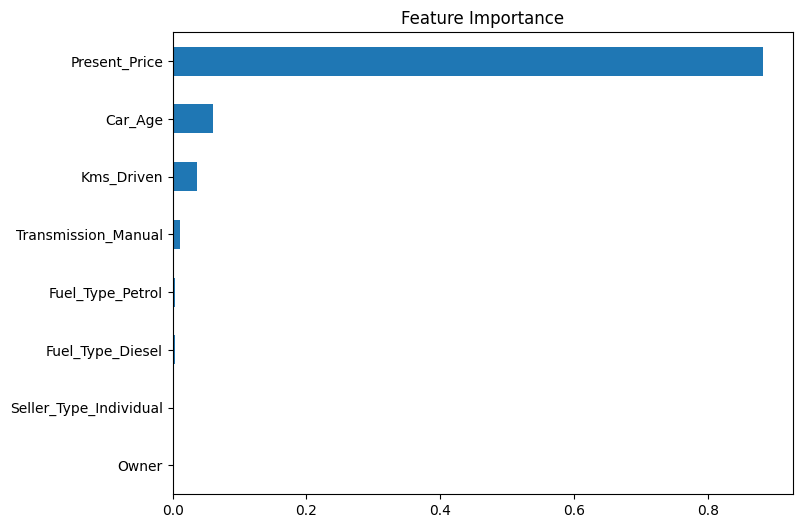

In [18]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()

### Saving Model in local device

In [19]:
joblib.dump(model, "car_price_model.pkl")

['car_price_model.pkl']

### Testing the Model with a Sample Input

In [20]:
def predict_price(model, input_data):
    input_df = pd.DataFrame([input_data])
    return round(model.predict(input_df)[0],2)

In [21]:
sample = {
    'Present_Price': 6.5,
    'Kms_Driven': 100,
    'Owner' : 0,
    'Car_Age': 0,
    'Fuel_Type_Diesel': 1,
    'Fuel_Type_Petrol': 0,
    'Seller_Type_Individual': 1,
    'Transmission_Manual': 0,
}

predict_price(model, sample)

np.float64(5.75)

In [22]:
sample = {
    'Present_Price': 5.09,
    'Kms_Driven': 20500,
    'Owner' : 0,
    'Car_Age': 5,
    'Fuel_Type_Diesel': 0,
    'Fuel_Type_Petrol': 0,
    'Seller_Type_Individual': 1,
    'Transmission_Manual': 0,
}

predict_price(model, sample)

np.float64(3.38)